## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [62]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi


/bin/sh: nvidia-smi: command not found


In [63]:
import os
import keras

# 請嘗試設定 GPU：os.environ
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [64]:
train, test = keras.datasets.cifar10.load_data()

In [65]:
from sklearn import preprocessing

## 資料前處理
def preproc_x(x, flatten=True):
    x = (x-x.min())/float(x.max()-x.min())
    x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [66]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [67]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [68]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [69]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [70]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 21s 426us/step - loss: 1.9946 - acc: 0.2601 - val_loss: 1.8264 - val_acc: 0.3324
Epoch 2/100
50000/50000 [==============================] - 19s 370us/step - loss: 1.7622 - acc: 0.3649 - val_loss: 1.7042 - val_acc: 0.3871
Epoch 3/100
50000/50000 [==============================] - 18s 357us/step - loss: 1.6671 - acc: 0.4000 - val_loss: 1.6425 - val_acc: 0.4129
Epoch 4/100
50000/50000 [==============================] - 17s 349us/step - loss: 1.5969 - acc: 0.4279 - val_loss: 1.5474 - val_acc: 0.4494
Epoch 5/100
50000/50000 [==============================] - 17s 343us/step - loss: 1.5332 - acc: 0.4505 - val_loss: 1.5195 - val_acc: 0.4535
Epoch 6/100
50000/50000 [==============================] - 17s 337us/step - loss: 1.5066 - acc: 0.4608 - val_loss: 1.5230 - val_acc: 0.4573
Epoch 7/100
50000/50000 [==============================] - 17s

Epoch 57/100
50000/50000 [==============================] - 19s 371us/step - loss: 0.5537 - acc: 0.8031 - val_loss: 1.9558 - val_acc: 0.5028
Epoch 58/100
50000/50000 [==============================] - 19s 380us/step - loss: 0.5523 - acc: 0.8023 - val_loss: 2.0691 - val_acc: 0.5092
Epoch 59/100
50000/50000 [==============================] - 21s 427us/step - loss: 0.5408 - acc: 0.8053 - val_loss: 2.0202 - val_acc: 0.5070
Epoch 60/100
50000/50000 [==============================] - 18s 352us/step - loss: 0.5372 - acc: 0.8100 - val_loss: 2.1760 - val_acc: 0.4930
Epoch 61/100
50000/50000 [==============================] - 18s 360us/step - loss: 0.5157 - acc: 0.8147 - val_loss: 2.0989 - val_acc: 0.5098
Epoch 62/100
50000/50000 [==============================] - 21s 423us/step - loss: 0.4935 - acc: 0.8265 - val_loss: 2.1551 - val_acc: 0.5118
Epoch 63/100
50000/50000 [==============================] - 19s 377us/step - loss: 0.5051 - acc: 0.8180 - val_loss: 2.1605 - val_acc: 0.5008
Epoch 64/100


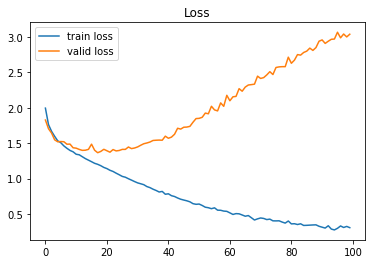

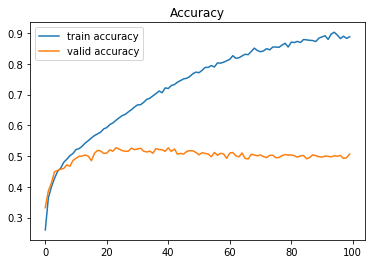

In [72]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()